In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np
import math
import pandas as pd
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef


from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import Rung as rung

import seaborn as sns


import seaborn as sns
import feature_finder_keiko as ff
import feature_finder_f as ff1
import scipy.stats as st

In [3]:
def uni_deseasonalize(ts,freq=12):
    ts = np.array(ts)
    N = len(ts)
    #averages = np.zeros((freq,n))
    temp = ts
    result = np.zeros((N))
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        result[Idx] = np.ravel((temp[Idx] - temp[Idx].mean())/temp[Idx].std())
    return(result) 

In [4]:
def deseasonalize(t,freq=12):
    ts = np.array(t)
    N = len(t)
    #averages = np.zeros((freq,n))
    temp = t
    r = np.zeros((N))
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        r[Idx] = np.ravel((temp[Idx] - temp[Idx].mean())/temp[Idx].std())
    return(r[-1])

def index_maker(ts,freq=12):
    ts = np.array(ts)
    N = len(ts)
    result = []
    for i in range(360,N):
        result.append(deseasonalize(ts[i-360:i]))
    return(result)

In [5]:
def crosscorr(datax, datay, lag=1):   
    return(stats.pearsonr(datax[lag:], datay[:-lag]))

In [6]:
def spi_timeseries_block(file_name, start_year = 1922, end_year=2015, base_year = 1922):
    start_index = (start_year - base_year) * 12
    end_index = start_index + (end_year - (start_year - 1))*12
    ET_gamma = np.load(file_name)
    return(ET_gamma[start_index:end_index,:])

In [7]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)

n_components_sst = np.load("sst_number.npy")
tau = 12
f = 12
level = 99

In [8]:
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
lon1_sst = np.arange(-180,180,2)
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[0], -9.96921e+36)

In [9]:
deg_result = np.zeros((len(lat_sst),len(lon1_sst)))
tau = 12
deg_result1 = np.load("../../whole_data_results/ZW/areas_1/pcmci_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))

In [16]:
level = np.ceil(np.nanmax(deg_result1)*0.8)

deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


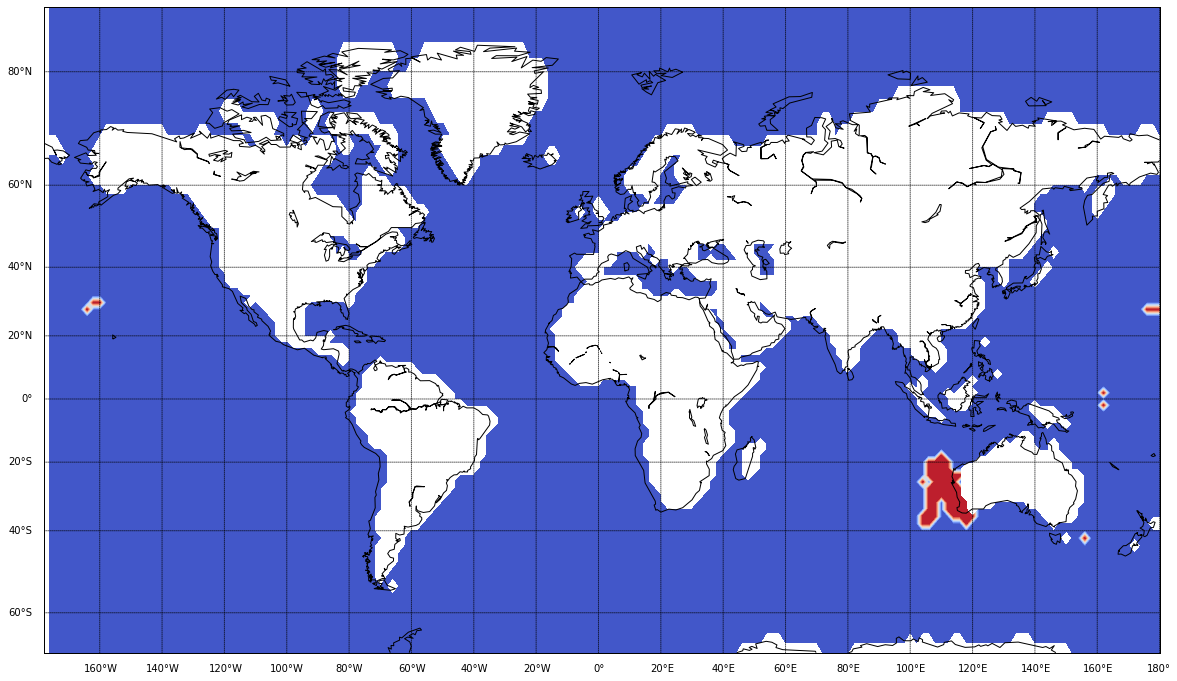

In [17]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
#plt.savefig("areas_PCMCI_{}_cut_ZW.png".format(tau))

In [18]:
lon1_sst = np.arange(-178,182,2)

index = deg_result > 0

index_result = np.zeros(10988, dtype=bool)

for i in range(data_sst.shape[1]):
    if not len(np.where(lon1_sst == df_sst.iloc[i,0])[0])==0:
        lon_index = np.where(lon1_sst == df_sst.iloc[i,0])[0][0]
    else:
        continue
    
    if not len(np.where(lat_sst == df_sst.iloc[i,1])[0])==0:
        lat_index = np.where(lat_sst == df_sst.iloc[i,1])[0][0]
    else:
        continue
           
    if index[lat_index,lon_index] == True:
        index_result[i] = True

In [31]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

pcmci = result[:,index_result].mean(1)

pcmci = uni_deseasonalize(pcmci)
#pcmci = index_maker(pcmci)

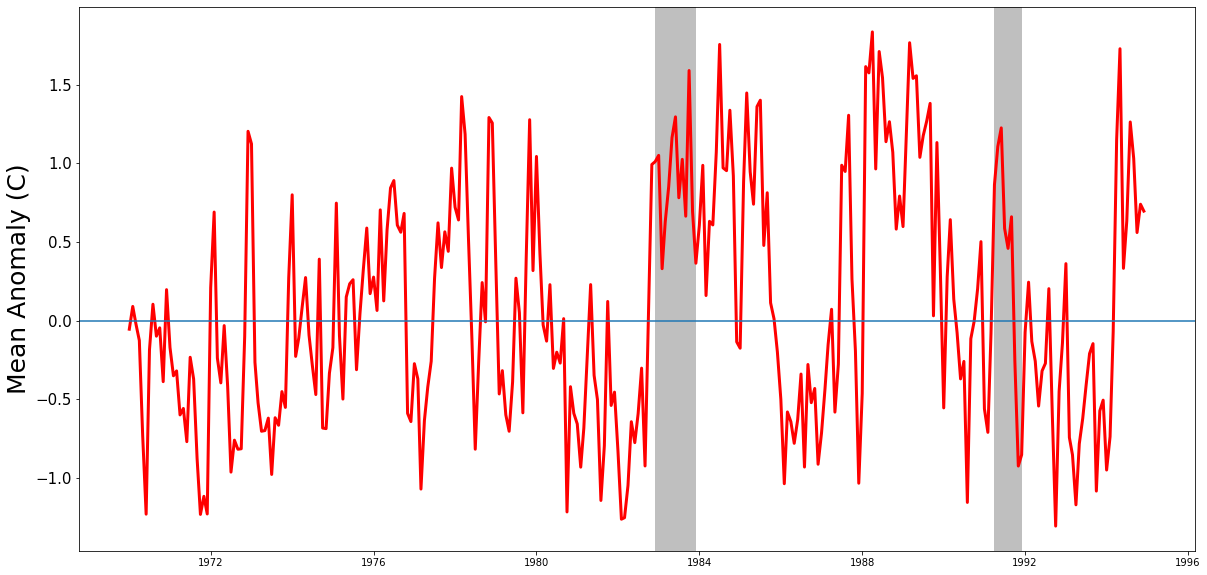

In [25]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, pcmci[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1970_1995_ZW.png");

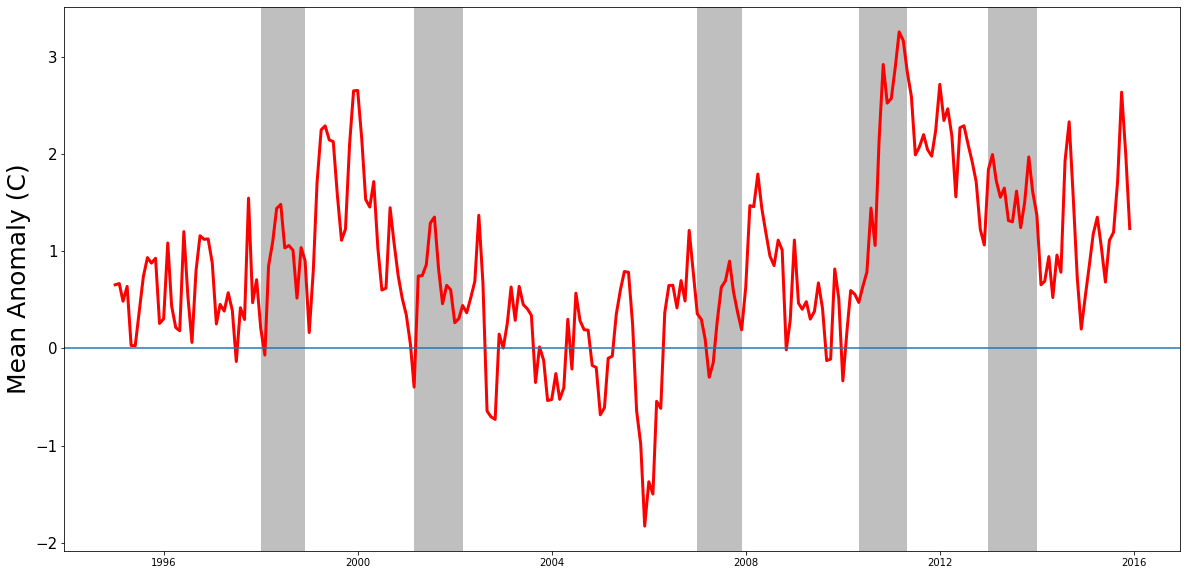

In [26]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, pcmci[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015_ZW.png");

In [32]:
dmi = ff.timeseries_enso('dmi.npy',1970,1994,1948)
enso = ff.timeseries_enso('oni.npy',1970,1994,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


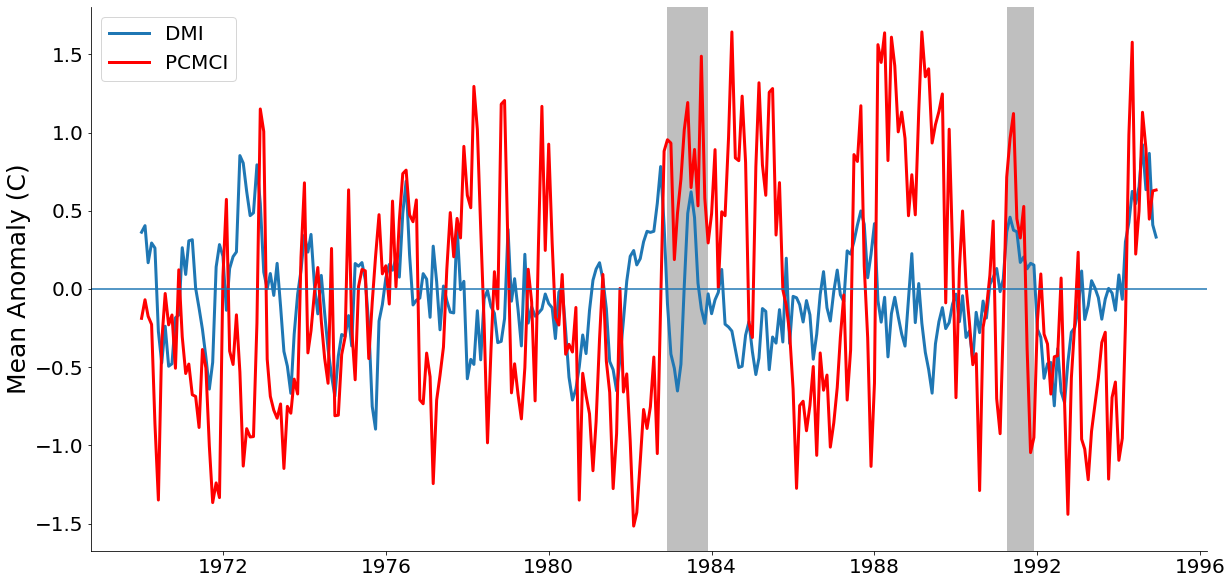

In [33]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, dmi, linewidth = 3,label="DMI")
#plt.plot(x, enso, linewidth = 3,label="ONI")
plt.plot(x, pcmci[240:540], linewidth = 3, color = 'r', label = "PCMCI")
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("pcmci_dmi_1970_1995_ZW.png");

In [34]:
dmi = ff.timeseries_enso('dmi.npy',1995,2015,1948)
enso = ff.timeseries_enso('oni.npy',1995,2015,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


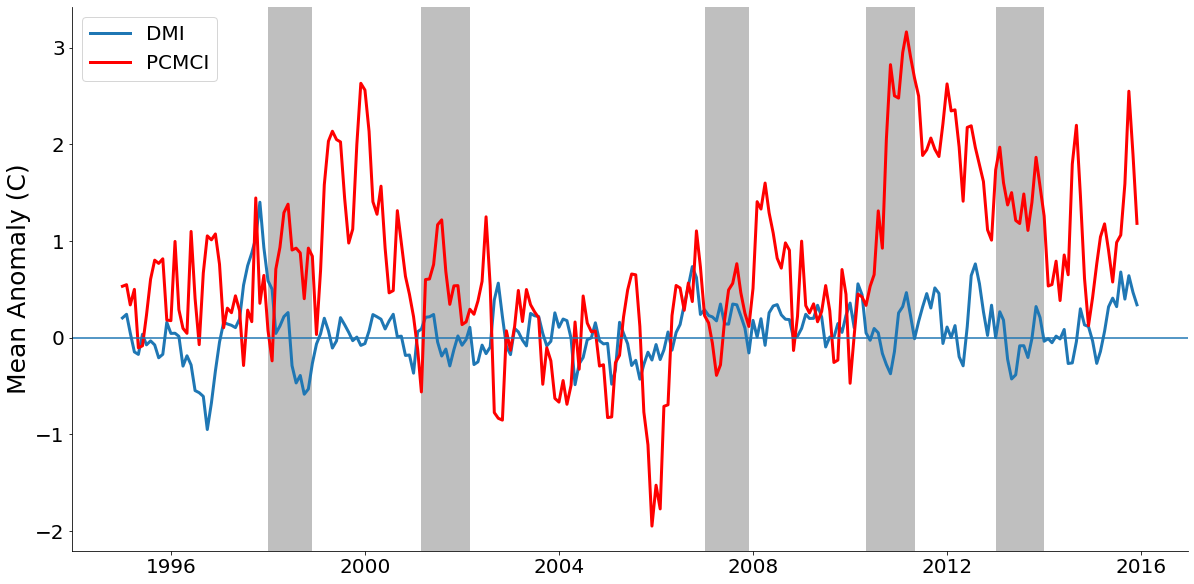

In [35]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, dmi, linewidth = 3,label="DMI")
#plt.plot(x, enso, linewidth = 3,label="ENSO")
plt.plot(x, pcmci[540:], linewidth = 3, color = 'r', label = "PCMCI")
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("pcmci_dmi_1996_2015_ZW.png");

In [36]:
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
lon1_sst = np.arange(-180,180,2)
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst[0], -9.96921e+36)

In [37]:
deg_result = np.zeros((len(lat_sst),len(lon1_sst)))
tau = 12
deg_result1 = np.load("../../whole_data_results/ZW/areas_1/corr_{}_{}_{}_{}_{}.npy".format(f,step,test_start[0],test_end[-1],tau))

In [38]:
level = np.ceil(np.nanmax(deg_result1)*0.7)

deg_result = np.zeros(deg_result1.shape)
nan_index= np.isnan(deg_result1)

deg_result[deg_result1 > level] = 1
deg_result[nan_index] = np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


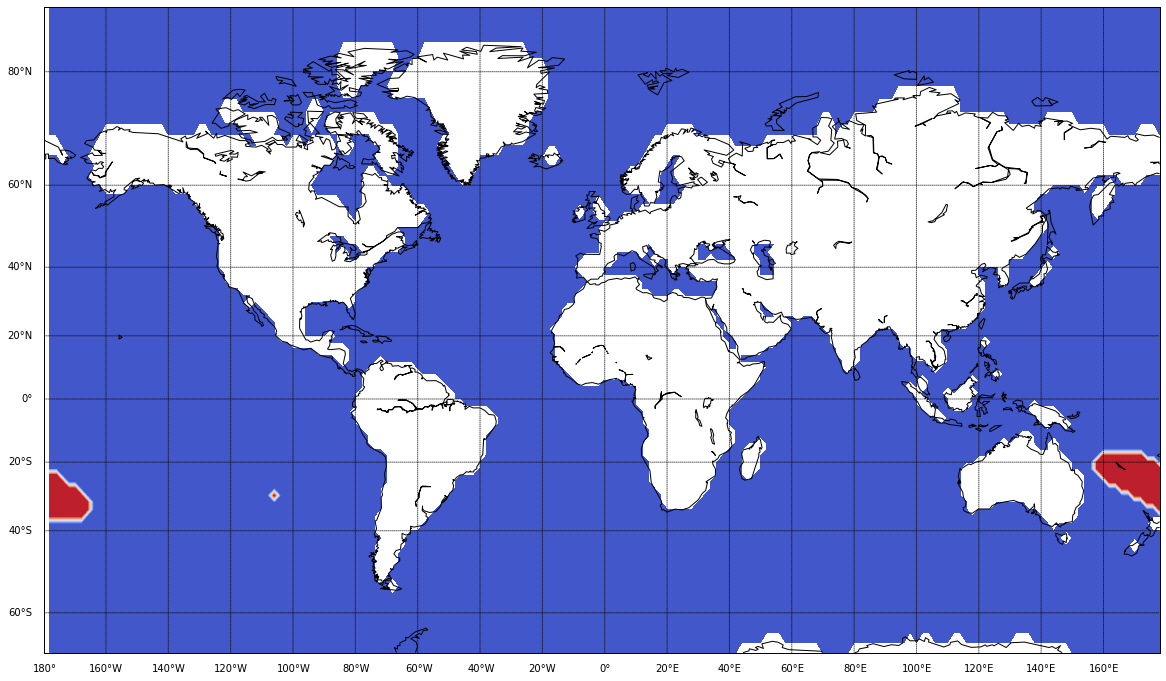

In [39]:
#deg_result[deg_result > 0] = 1

lon  = lon1_sst
lat = lat_sst
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_sst.min(), \
  urcrnrlon=lon1_sst.max(),llcrnrlat=lat_sst.min()+20,urcrnrlat=lat_sst.max(), \
  resolution='c')

#m = Basemap(projection='robin',lon_0=0,resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title('PCMCI, lag of {}'.format(tau),fontsize=20)
#cbar.ax.tick_params(labelsize=25)
#plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))
plt.savefig("areas_CORR_{}_cut_ZW.png".format(tau))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


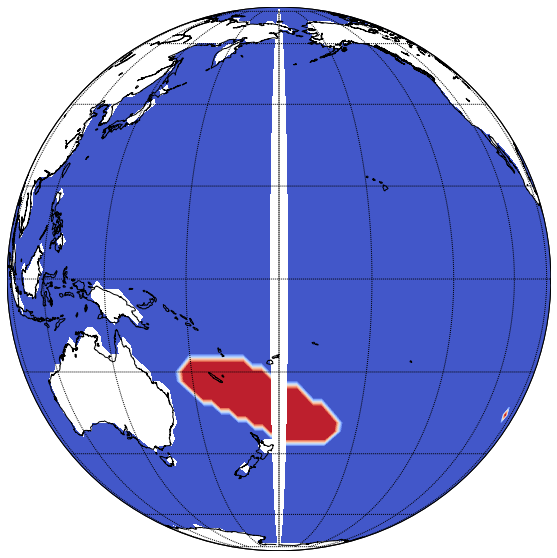

In [40]:
lon  = lon1_sst
lat = lat_sst
m = Basemap(projection='ortho',lat_0=0,lon_0=-180,resolution='l')
lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(15,10))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg_result,20,cmap=plt.cm.get_cmap('coolwarm'))
#plt.title(' EOF 1')
#cbar.ax.tick_params(labelsize=25)
#cbar.ax.tick_params(labelsize=30) 
#plt.colorbar()
#cbar = plt.colorbar(cs, orientation='vertical')
#cbar.ax.tick_params(labelsize=18)

In [44]:
lon1_sst = np.arange(-178,182,2)

index = deg_result > 0

index_result = np.zeros(10988, dtype=bool)

for i in range(data_sst.shape[1]):
    if not len(np.where(lon1_sst == df_sst.iloc[i,0])[0])==0:
        lon_index = np.where(lon1_sst == df_sst.iloc[i,0])[0][0]
    else:
        continue
    
    if not len(np.where(lat_sst == df_sst.iloc[i,1])[0])==0:
        lat_index = np.where(lat_sst == df_sst.iloc[i,1])[0][0]
    else:
        continue
           
    if index[lat_index,lon_index] == True:
        index_result[i] = True

In [45]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1950, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

corr = result[:,index_result].mean(1)

corr = uni_deseasonalize(corr)
#corr = index_maker(corr)


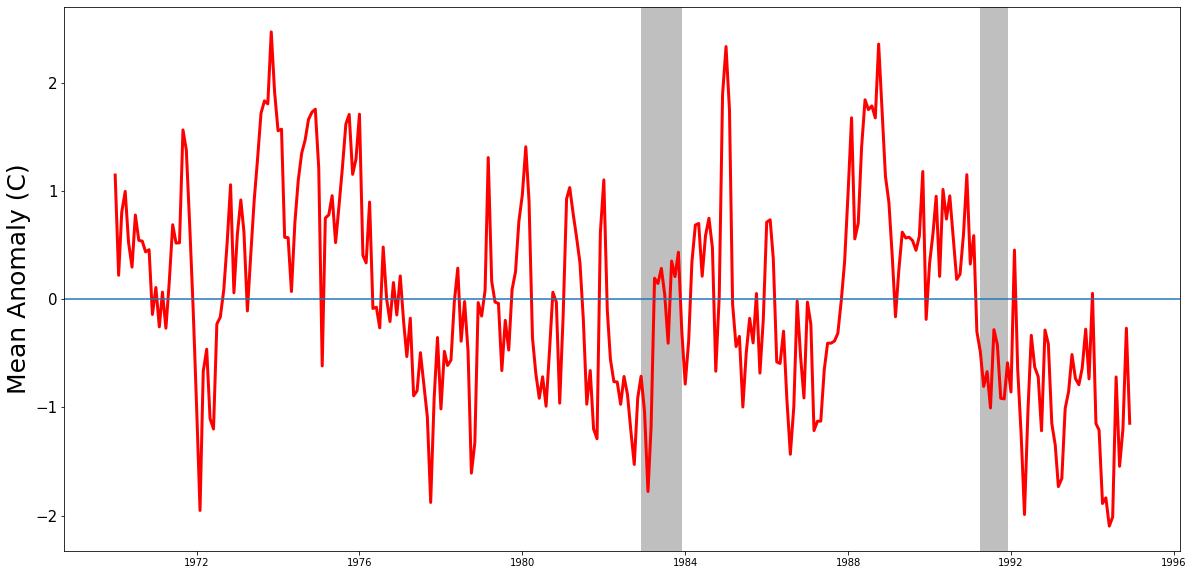

In [36]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, corr[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.savefig("corr_areas_1970_1995_ZW.png");

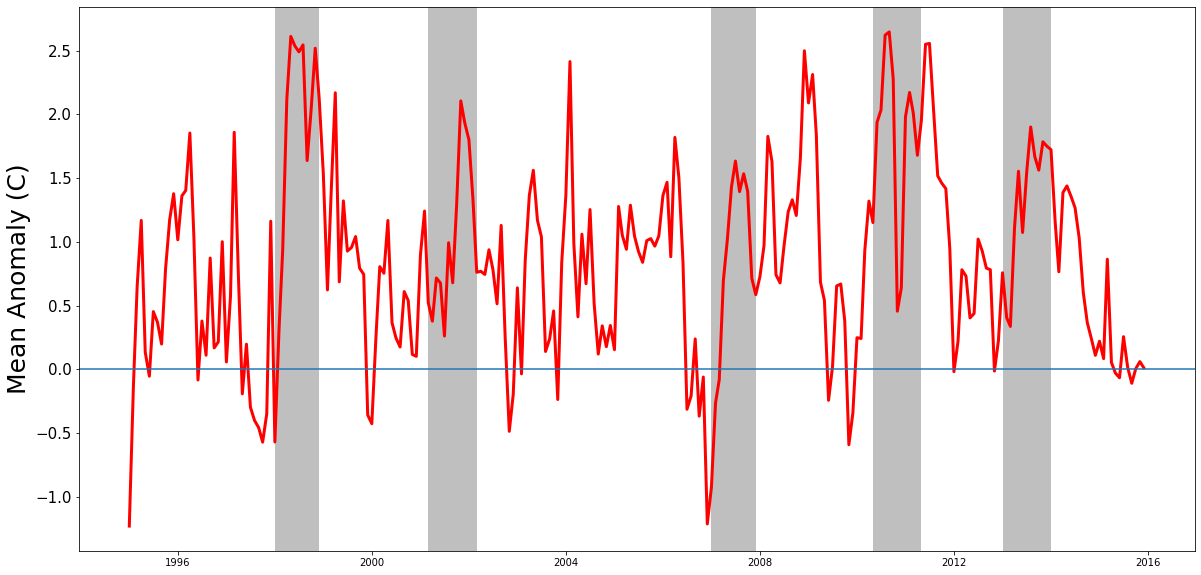

In [37]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, corr[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.savefig("corr_areas_1996_2015_ZW.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


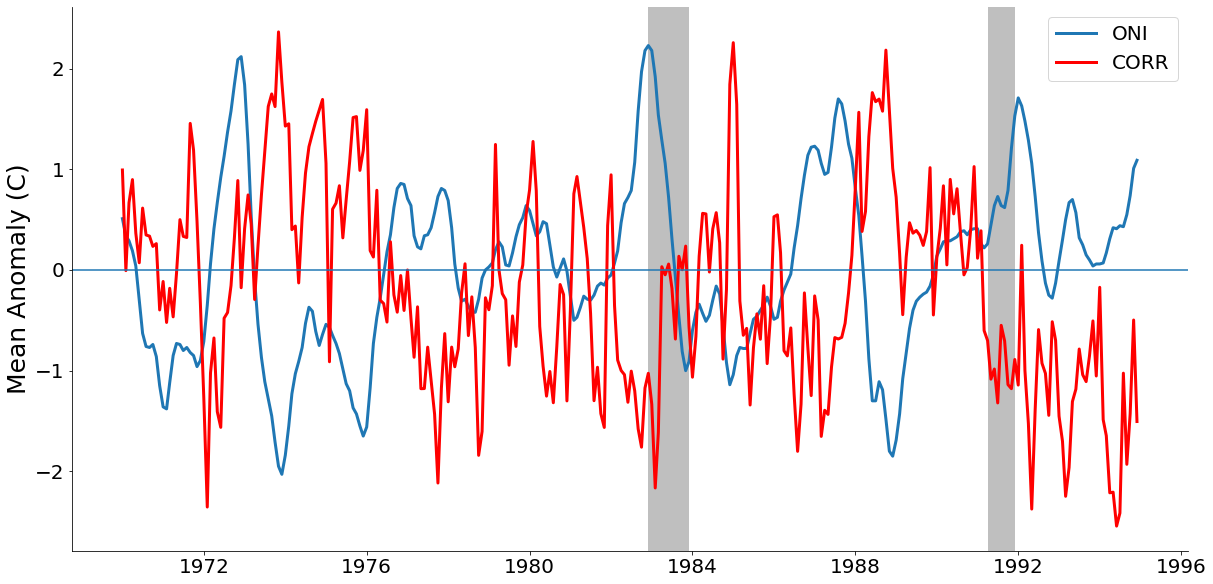

In [49]:
dmi = ff.timeseries_enso('dmi.npy',1970,1994,1948)
enso = ff.timeseries_enso('oni.npy',1970,1994,1950)

x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
#plt.plot(x, dmi, linewidth = 3,label="DMI")
plt.plot(x, enso, linewidth = 3,label="ONI")
plt.plot(x, corr[240:540], linewidth = 3, color = 'r', label = "CORR")
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("CORR_enso_1970_1995_ZW.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


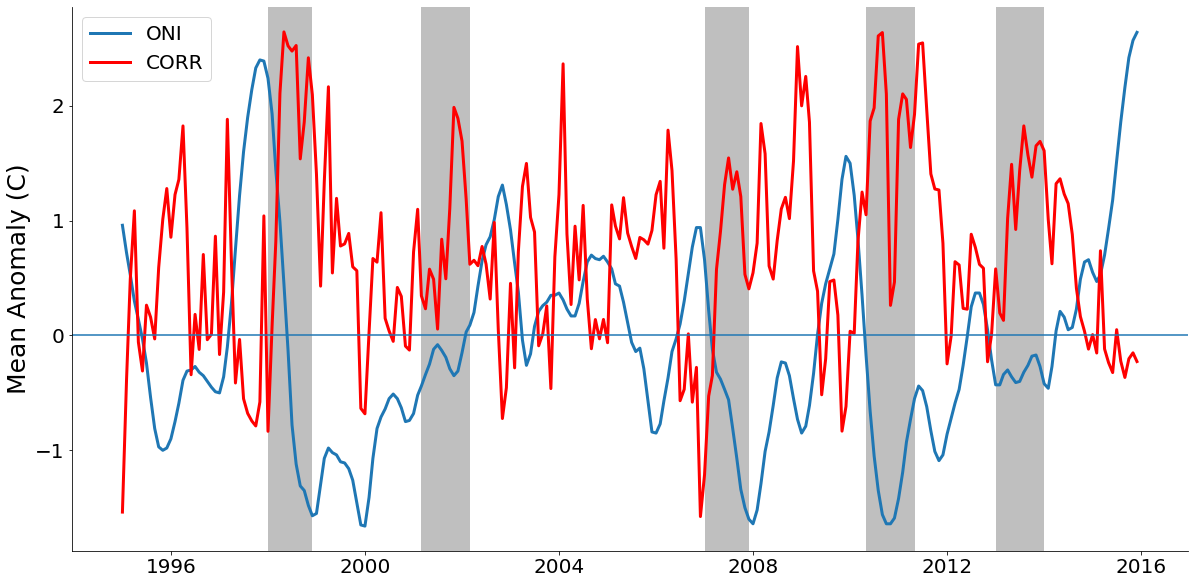

In [50]:
dmi = ff.timeseries_enso('dmi.npy',1995,2015,1948)
enso = ff.timeseries_enso('oni.npy',1995,2015,1950)

x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
#plt.plot(x, dmi, linewidth = 3,label="DMI")
plt.plot(x, enso, linewidth = 3,label="ONI")
plt.plot(x, corr[540:], linewidth = 3, color = 'r', label = "CORR")
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
plt.savefig("CORR_enso_1996_2015_ZW.png");

In [46]:
dmi = ff.timeseries_enso('dmi.npy',1980,1994,1948)
enso = ff.timeseries_enso('oni.npy',1980,1994,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


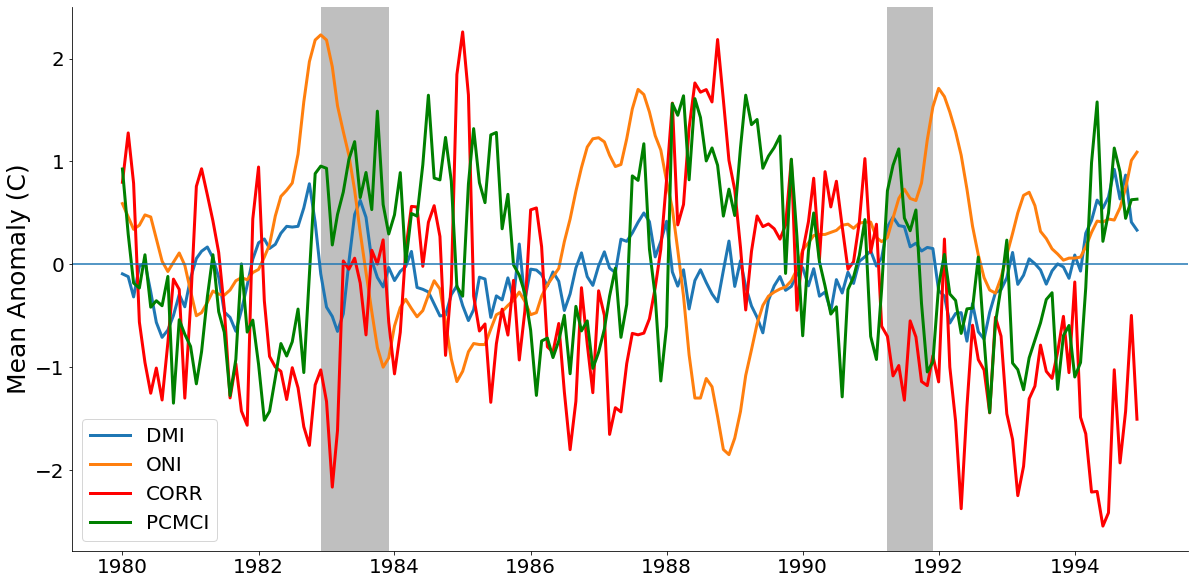

In [120]:
x = np.arange('1980-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, dmi, linewidth = 3,label="DMI")
plt.plot(x, enso, linewidth = 3,label="ONI")
plt.plot(x, corr[360:540], linewidth = 3, color = 'r', label = "CORR")
#plt.plot(x, pcmci[360:540], linewidth = 3, color = 'g', label = "PCMCI")
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
#plt.savefig("CORR_enso_1970_1995_ZW.png");

In [121]:
dmi = ff.timeseries_enso('dmi.npy',1995,2015,1948)
enso = ff.timeseries_enso('oni.npy',1995,2015,1950)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


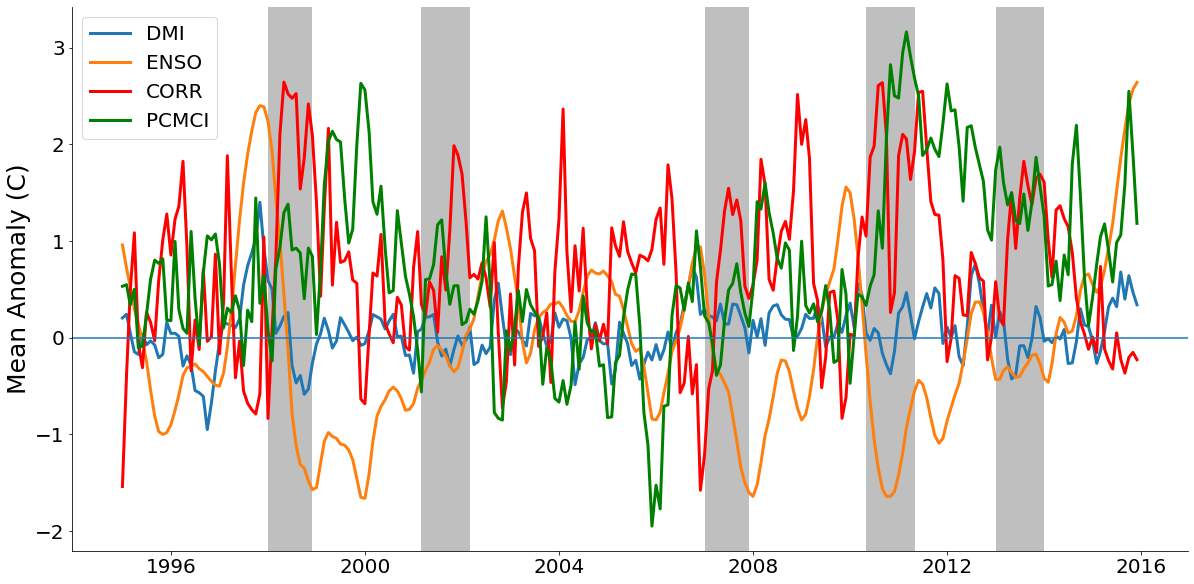

In [124]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, dmi, linewidth = 3,label="DMI")
plt.plot(x, enso, linewidth = 3,label="ENSO")
plt.plot(x, corr[540:], linewidth = 3, color = 'r', label = "CORR")
plt.plot(x, pcmci[540:], linewidth = 3, color = 'g', label = "PCMCI")
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 20);
plt.xticks(fontsize = 20);
plt.legend(fontsize = 20)
#plt.savefig("CORR_enso_1996_2015_ZW.png");

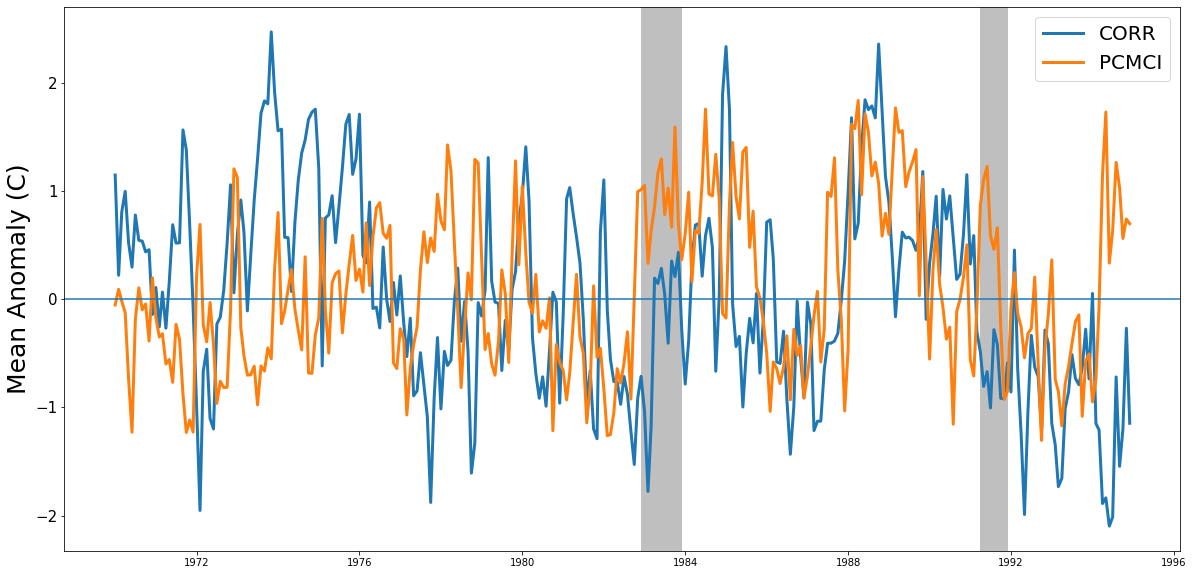

In [208]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, corr[480:780], linewidth = 3, label = "CORR")
plt.plot(x, pcmci[480:780], linewidth = 3, label = "PCMCI")
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.legend(fontsize = 20)
#plt.savefig("corr_areas_1970_1995_ZW.png");

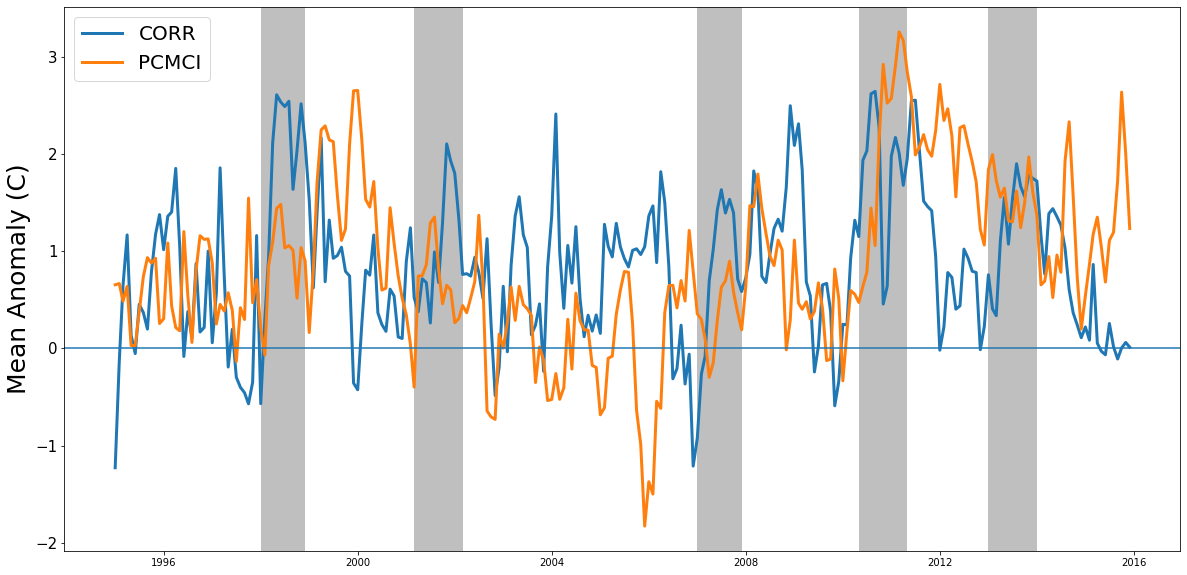

In [211]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
#plt.plot(x, enso, linewidth = 2,label="ENSO")
plt.plot(x, corr[780:], linewidth = 3, label = "CORR")
plt.plot(x, pcmci[780:], linewidth = 3, label = "PCMCI")
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.legend(fontsize = 20)
#plt.savefig("CORR_combined_areas_1996_2015_ZW.png");

In [253]:
len(pcmci)

792

In [254]:
len(drought)

792

In [ ]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)
test_start = np.arange(1983,2012,step)
test_end = np.arange(1987,2016,step)


420

In [260]:
tau = 12
start_lag = tau
end_lag = tau + 11
result = []

In [265]:
i = 420

In [278]:
drought_temp = drought[i-420:i]
pcmci_temp = pcmci[i-420:i]

drought_train = pd.DataFrame({"drought":drought_temp[:360]})
lags = np.arange(start_lag,end_lag + 1)
drought_train = drought_train.assign(**{
'{} (t-{})'.format(col, t): drought_train[col].shift(t)
for t in lags
for col in drought_train
})

drought_test = pd.DataFrame({"drought":drought_temp[360:]})
lags = np.arange(start_lag,end_lag + 1)
drought_test = drought_test.assign(**{
'{} (t-{})'.format(col, t): drought_test[col].shift(t)
for t in lags
for col in drought_test
})

pcmci_train = pd.DataFrame({"pcmci":pcmci_temp[:360]})
lags = np.arange(start_lag,end_lag + 1)
pcmci_train = pcmci_train.assign(**{
'{} (t-{})'.format(col, t): pcmci_train[col].shift(t)
for t in lags
for col in pcmci_train
})

pcmci_test = pd.DataFrame({"pcmci":pcmci_temp[360:]})
lags = np.arange(start_lag,end_lag + 1)
pcmci_test = pcmci_test.assign(**{
'{} (t-{})'.format(col, t): pcmci_test[col].shift(t)
for t in lags
for col in pcmci_test
})
    

In [282]:
train = pd.concat([drought_train, pcmci_train],axis=1)
train = train.dropna()
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train)

test = pd.concat([drought_test, pcmci_test],axis=1)
test = test.dropna()
x_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

y_pred = model.predict(x_test)

result.append(mean_squared_error(y_test, y_pred))

In [283]:
result

[4658.275134023102]

In [331]:
tau = 9
start_lag = tau
end_lag = tau + 11
result = []

for i in range(420,792):
    drought_temp = drought[i-420:i]
    pcmci_temp = pcmci[i-420:i]

    drought_train = pd.DataFrame({"drought":drought_temp[:360]})
    lags = np.arange(start_lag,end_lag + 1)
    drought_train = drought_train.assign(**{
    '{} (t-{})'.format(col, t): drought_train[col].shift(t)
    for t in lags
    for col in drought_train
    })

    drought_test = pd.DataFrame({"drought":drought_temp[360:]})
    lags = np.arange(start_lag,end_lag + 1)
    drought_test = drought_test.assign(**{
    '{} (t-{})'.format(col, t): drought_test[col].shift(t)
    for t in lags
    for col in drought_test
    })

    pcmci_train = pd.DataFrame({"pcmci":pcmci_temp[:360]})
    lags = np.arange(start_lag,end_lag + 1)
    pcmci_train = pcmci_train.assign(**{
    '{} (t-{})'.format(col, t): pcmci_train[col].shift(t)
    for t in lags
    for col in pcmci_train
    })

    pcmci_test = pd.DataFrame({"pcmci":pcmci_temp[360:]})
    lags = np.arange(start_lag,end_lag + 1)
    pcmci_test = pcmci_test.assign(**{
    '{} (t-{})'.format(col, t): pcmci_test[col].shift(t)
    for t in lags
    for col in pcmci_test
    })
       
    train = pd.concat([drought_train, pcmci_train],axis=1)
    train = train.dropna()
    x_train = train.iloc[:,1:]
    y_train = train.iloc[:,0]

    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train)

    test = pd.concat([drought_test, pcmci_test],axis=1)
    test = test.dropna()
    x_test = test.iloc[:,1:]
    y_test = test.iloc[:,0]

    y_pred = model.predict(x_test)

    result.append(mean_squared_error(y_test, y_pred))

In [332]:
result = np.array(result)
result_pcmci = result.copy()

In [333]:
tau = 9
start_lag = tau
end_lag = tau + 11
result = []

for i in range(420,792):
    drought_temp = drought[i-420:i]
    corr_temp = corr[i-420:i]

    drought_train = pd.DataFrame({"drought":drought_temp[:360]})
    lags = np.arange(start_lag,end_lag + 1)
    drought_train = drought_train.assign(**{
    '{} (t-{})'.format(col, t): drought_train[col].shift(t)
    for t in lags
    for col in drought_train
    })

    drought_test = pd.DataFrame({"drought":drought_temp[360:]})
    lags = np.arange(start_lag,end_lag + 1)
    drought_test = drought_test.assign(**{
    '{} (t-{})'.format(col, t): drought_test[col].shift(t)
    for t in lags
    for col in drought_test
    })

    corr_train = pd.DataFrame({"corr":corr_temp[:360]})
    lags = np.arange(start_lag,end_lag + 1)
    corr_train = corr_train.assign(**{
    '{} (t-{})'.format(col, t): corr_train[col].shift(t)
    for t in lags
    for col in corr_train
    })

    corr_test = pd.DataFrame({"corr":corr_temp[360:]})
    lags = np.arange(start_lag,end_lag + 1)
    corr_test = corr_test.assign(**{
    '{} (t-{})'.format(col, t): corr_test[col].shift(t)
    for t in lags
    for col in corr_test
    })
       
    train = pd.concat([drought_train, corr_train],axis=1)
    train = train.dropna()
    x_train = train.iloc[:,1:]
    y_train = train.iloc[:,0]

    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train)

    test = pd.concat([drought_test, corr_test],axis=1)
    test = test.dropna()
    x_test = test.iloc[:,1:]
    y_test = test.iloc[:,0]

    y_pred = model.predict(x_test)

    result.append(mean_squared_error(y_test, y_pred))

In [334]:
result = np.array(result)

In [335]:
result_corr = result.copy()

In [336]:
d = result_pcmci - result_corr
T, p = stats.ttest_1samp(d,popmean=0)

In [341]:
result_corr.mean()

2891.2254264415337

In [342]:
result_pcmci.mean()

3063.2839502080205

In [339]:
p

0.031233071658620024

In [340]:
T

2.1623076339762206

In [ ]:
drought_df = pd.DataFrame({"drought":drought[i-]})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})

In [256]:
df = pd.DataFrame({'drought':np.array(drought[N:]), 'pcmci':pcmci[:-N], 'corr':corr[:-N] })

In [257]:
df1 = pd.DataFrame({'drought1':np.array(drought[N:]), 'pcmci1':pcmci[:-N], 'corr1':corr[:-N] })

In [259]:
pd.concat([df1, df],axis=1)

,drought1,pcmci1,corr1,drought,pcmci,corr
0,122,1.687350,-0.427131,122,1.687350,-0.427131
1,122,1.148172,-0.566645,122,1.148172,-0.566645
2,126,0.417580,-1.099856,126,0.417580,-1.099856
3,26,0.548659,-0.617976,26,0.548659,-0.617976
4,67,0.238314,-0.580354,67,0.238314,-0.580354
...,...,...,...,...,...,...
775,26,1.796374,0.880246,26,1.796374,0.880246
776,39,2.197566,0.411621,39,2.197566,0.411621
777,63,1.473545,0.164855,63,1.473545,0.164855
778,91,0.615101,0.036511,91,0.615101,0.036511


In [52]:
len(drought)

792

In [3]:
import feature_finder_keiko as ff

Could not import rpy package
Could not import r-package RCIT


In [9]:
amo = ff.timeseries_enso('amo_1891_2015.npy',1948,2015,1891)

In [10]:
len(amo)

816

In [11]:
np.save('amo.npy',amo)

In [18]:
dmi = ff.timeseries_enso('dmi.npy',1950,2015,1950)
enso = ff.timeseries_enso('nino.npy',1950,2015,1950)

In [19]:
drought,_ = ff.drought_timeseries("ET_gamma_18912015_12.npy", start_year = 1950, end_year=2015, extremes_treshold = -1, base_year = 1922)

In [49]:
pcmci1 = pcmci[240:]
corr1 = corr[240:]

In [20]:
N = 12
df = pd.DataFrame({'drought':np.array(drought[N:]),'corr':corr[:-N],'pcmci':pcmci[:-N],'enso':enso[:-N], 'dmi':dmi[:-N] })

In [24]:
len(df)

780

In [25]:
x_train = df.iloc[:600,:]
x_test = df.iloc[600:,:]

y_train = df.iloc[:600]
y_test = df.iloc[600:]

In [21]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [74]:
X

,corr,pcmci,enso,dmi
0,-0.429502,1.695508,-0.362905,0.218886
1,-0.549936,1.121964,0.177752,-1.232680
2,-1.019053,0.448143,0.999552,-1.578013
3,-0.670184,0.577032,1.140123,-1.013189
4,-0.599569,0.259661,1.302320,-0.515677
...,...,...,...,...
784,-0.259119,0.939613,0.675157,1.090997
785,-0.299045,0.571117,0.426455,1.354386
786,0.048951,1.005098,-0.027698,1.096850
787,-0.209465,1.089456,-0.406158,2.144553


array([0.2397009 , 0.27654693, 0.2579357 , 0.22581648])

Feature: 0, Score: 0.24542
Feature: 1, Score: 0.29049
Feature: 2, Score: 0.23406
Feature: 3, Score: 0.23003


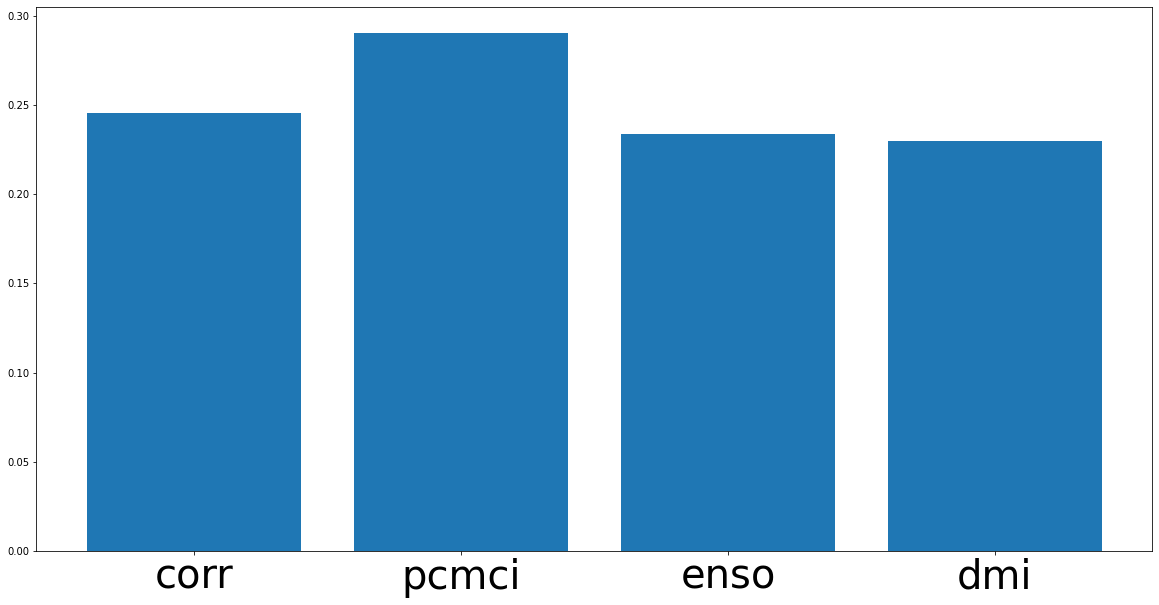

In [52]:
tau = 12
df = pd.DataFrame({'drought':np.array(drought[tau:]),'corr':corr[:-tau],'pcmci':pcmci[:-tau],'enso':enso[:-tau], 'dmi':dmi[:-tau] })
df=(df-df.mean())/df.std()

In [53]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                drought   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.253
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           5.92e-05
Time:                        13:50:37   Log-Likelihood:                -1093.9
No. Observations:                 780   AIC:                             2198.
Df Residuals:                     775   BIC:                             2221.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.882e-15      0.035   -1.1e-13      1.0

/home/mathsys2/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [55]:
importance

array([0.24273132, 0.29706447, 0.22347378, 0.23673043])

Feature: 0, Score: 0.24273
Feature: 1, Score: 0.29706
Feature: 2, Score: 0.22347
Feature: 3, Score: 0.23673


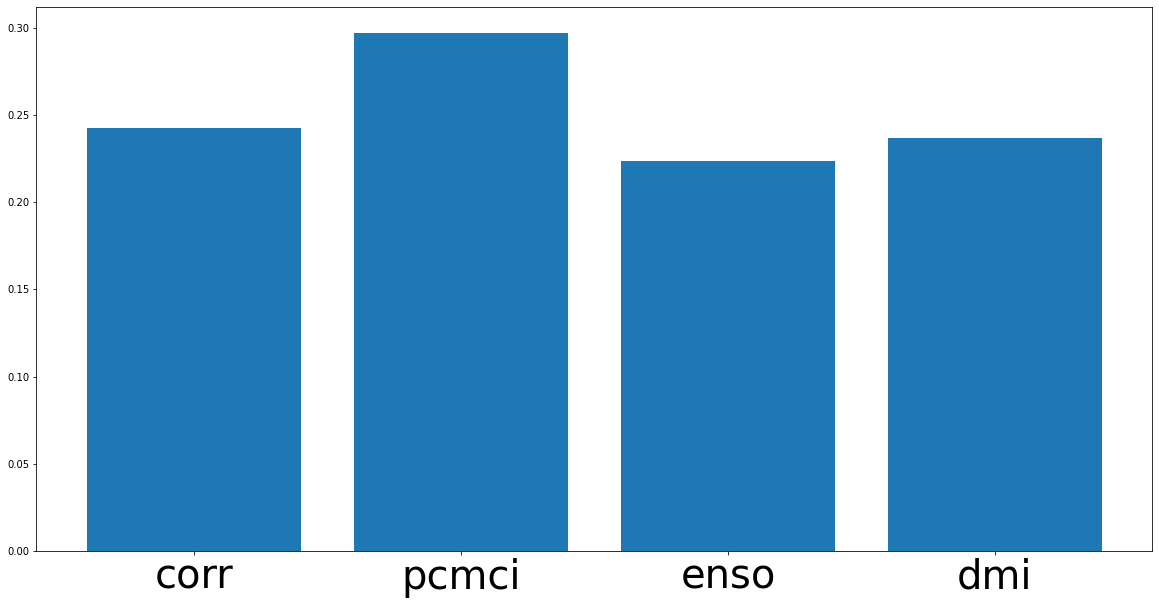

In [56]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in X.columns], importance)
plt.xticks(fontsize = 40)
plt.savefig("ZW_features_ranks_{}.png".format(tau))
plt.show()

In [178]:
ZW = spi_timeseries_block("ZW_gamma_18912015_12.npy", start_year = 1950, end_year=2015,base_year = 1922)
#ET = spi_timeseries_block("ET_data_geopy.npy", start_year = 1950, end_year=2015,base_year = 1922)

In [246]:
level = 0.01

In [249]:
result = []
for j in range(ZW.shape[1]):
    #r, p =st.pearsonr(d1, np.ravel(ET[:,j]))
    r, p =crosscorr(np.ravel(ZW[:,j]),corr,12)
    if p<level:
        result.append(r)
    else:
        result .append(np.nan)

In [250]:
np.count_nonzero(~np.isnan(np.array(result)))

118

In [252]:
len(corr)

792

In [251]:
df

,drought,pcmci,corr
0,122,1.687350,-0.427131
1,122,1.148172,-0.566645
2,126,0.417580,-1.099856
3,26,0.548659,-0.617976
4,67,0.238314,-0.580354
...,...,...,...
775,26,1.796374,0.880246
776,39,2.197566,0.411621
777,63,1.473545,0.164855
778,91,0.615101,0.036511


In [54]:
temporal_limits = {"time_min":datetime(1891, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}
data_sst, ts, V, df_sst, lon_sst, lat_sst = ff.PCA_computer_rotated_locs('../../../nc/sst.mnmean.nc', "sst",temporal_limits, 116, -9.96921e+36)

In [55]:
dmi = ff.timeseries_enso('dmi_1891_2015.npy',1891,2015,1891)

In [30]:
ts.shape

(1500, 116)

In [56]:
result = []
p_values = []
for i in range(57):
    r,p = st.pearsonr(ts[:,i],dmi)
    result.append(r)
    p_values.append(p)

In [57]:
result = np.array(result)

In [64]:
np.where(result> 0.28)

(array([33]),)

In [26]:
result[6]

0.4250676900141069

In [27]:
p_values[6]

7.405878922727813e-20

In [21]:
lon1_sst = np.arange(-178,182,2)

In [22]:
index = deg_result > 0

index_result = np.zeros(10988, dtype=bool)

for i in range(data_sst.shape[1]):
    if not len(np.where(lon1_sst == df_sst.iloc[i,0])[0])==0:
        lon_index = np.where(lon1_sst == df_sst.iloc[i,0])[0][0]
    else:
        continue
    
    if not len(np.where(lat_sst == df_sst.iloc[i,1])[0])==0:
        lat_index = np.where(lat_sst == df_sst.iloc[i,1])[0][0]
    else:
        continue
           
    if index[lat_index,lon_index] == True:
        index_result[i] = True

In [62]:
(1970 - 1930)*12

480

In [63]:
(1995 - 1930)*12

780

# ZW

In [106]:
file_name = '../../../nc/sst.mnmean.nc'
code = "sst"
temporal_limits 
missing_value  = -9.96921e+36
temporal_limits = {"time_min":datetime(1930, 1, 1, 0, 0),"time_max":datetime(2015, 12, 1, 0, 0)}

sst = Data(file_name,code,temporal_limits, missing_value= missing_value)
result = sst.get_data()

d = result[:,index_result].mean(1)

d = uni_deseasonalize(d)

In [24]:
corr = d.copy()

In [ ]:
dmi = ff.timeseries_enso('dmi.npy',1950,2015,1950)
enso = ff.timeseries_enso('oni.npy',1950,2015,1950)

In [75]:
st.pearsonr(corr[:-10],pcmci[10:])

(0.38142266607954556, 9.798546103017527e-37)

In [76]:
st.pearsonr(pcmci[:-10],corr[10:])

(0.41499339974610455, 8.2075791619870975e-44)

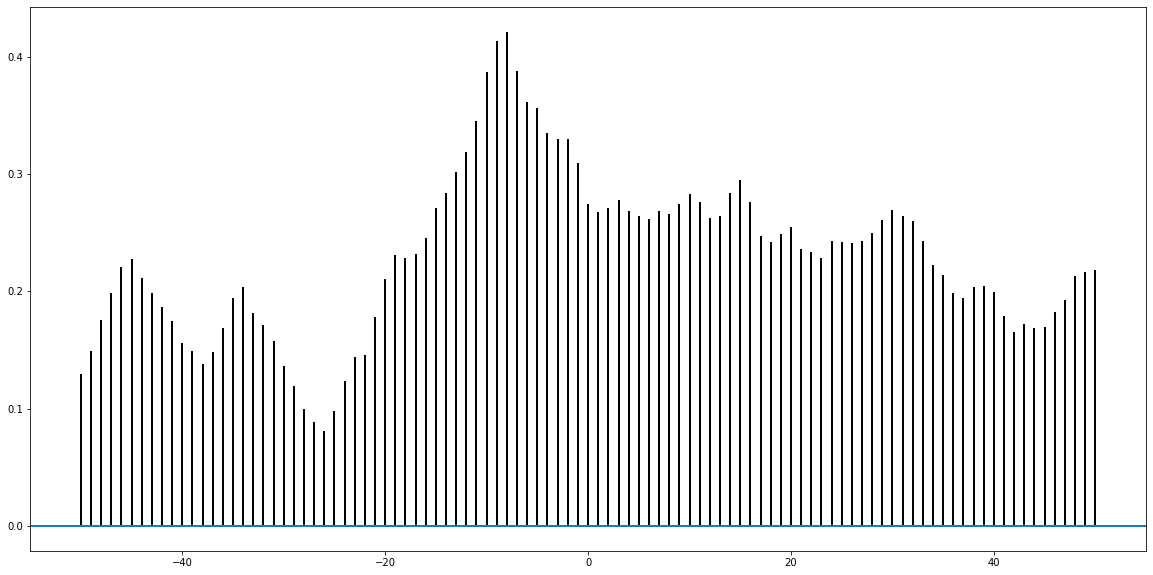

In [86]:
plt.xcorr(pcmci[:-480],corr[:-480],usevlines=True, maxlags=50, normed=True, lw=2);

In [45]:
st.pearsonr(dmi,pcmci[240:])

(0.21751274621749211, 6.175175523264145e-10)

(-0.1793802475659296, 3.744535038448764e-07)

In [56]:
st.pearsonr(pcmci[241:],enso[:-1])

(-0.18490829909001813, 1.62767301297241e-07)

In [60]:
st.pearsonr(pcmci[240:],dmi)

(0.21751274621749211, 6.175175523264145e-10)

In [59]:
st.pearsonr(pcmci[240:],enso)

(-0.1793802475659296, 3.744535038448764e-07)

In [49]:
st.pearsonr(enso,corr[240:])

(-0.39040334625764406, 3.0967941333410806e-30)

In [50]:
st.pearsonr(dmi,corr[240:])

(-0.004342408244781444, 0.9028881211911418)

In [33]:
len(corr[240:])

792

In [32]:
1032 - 792

240

(0.3681652382363613, 1.9086737593350222e-34)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


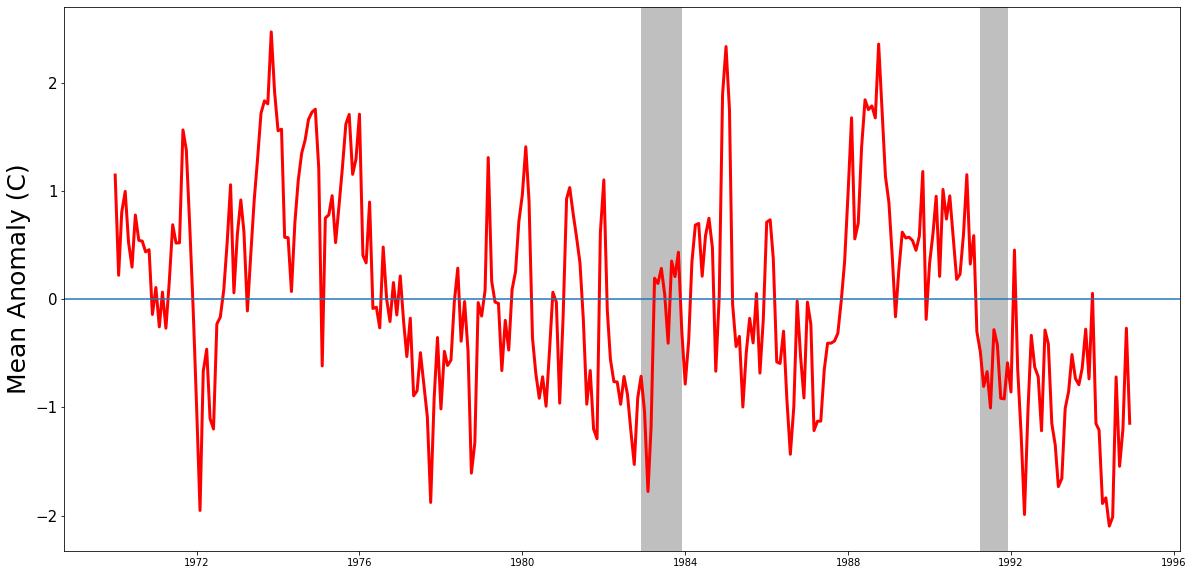

In [14]:
#CORR
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.savefig("pcmci_areas_1970_1995.png");

/home/mathsys2/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


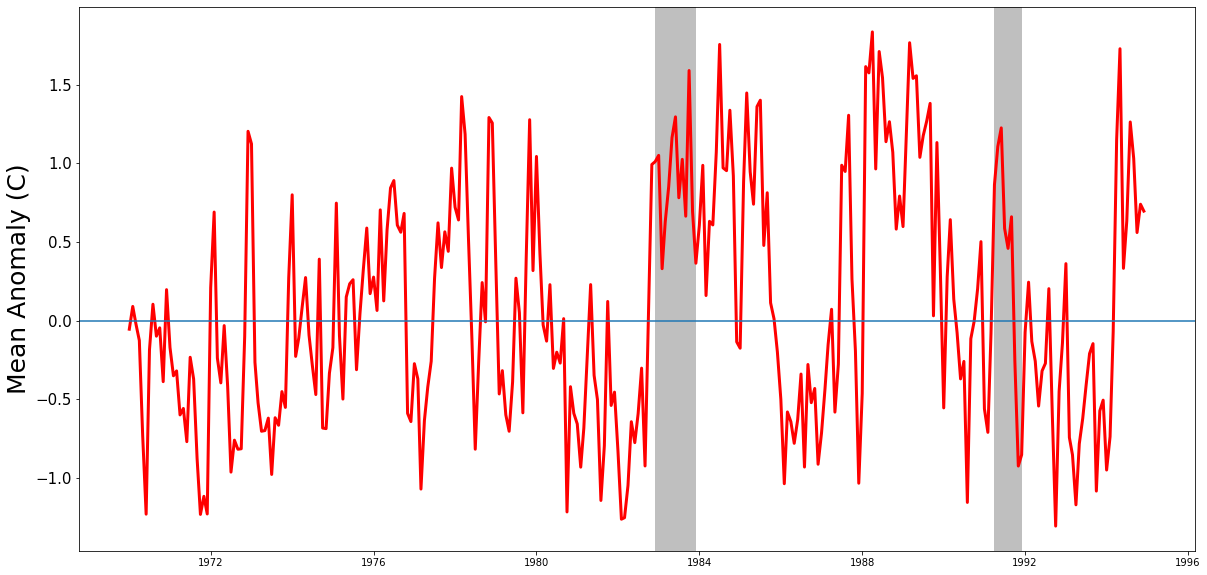

In [107]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, d[480:780], linewidth = 3, color = 'r')
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
#plt.axvspan('1987-06', '1988-06', facecolor='grey', alpha=0.5)
#plt.axvspan('1989-01', '1989-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
plt.savefig("pcmci_areas_1970_1995_ZW.png");

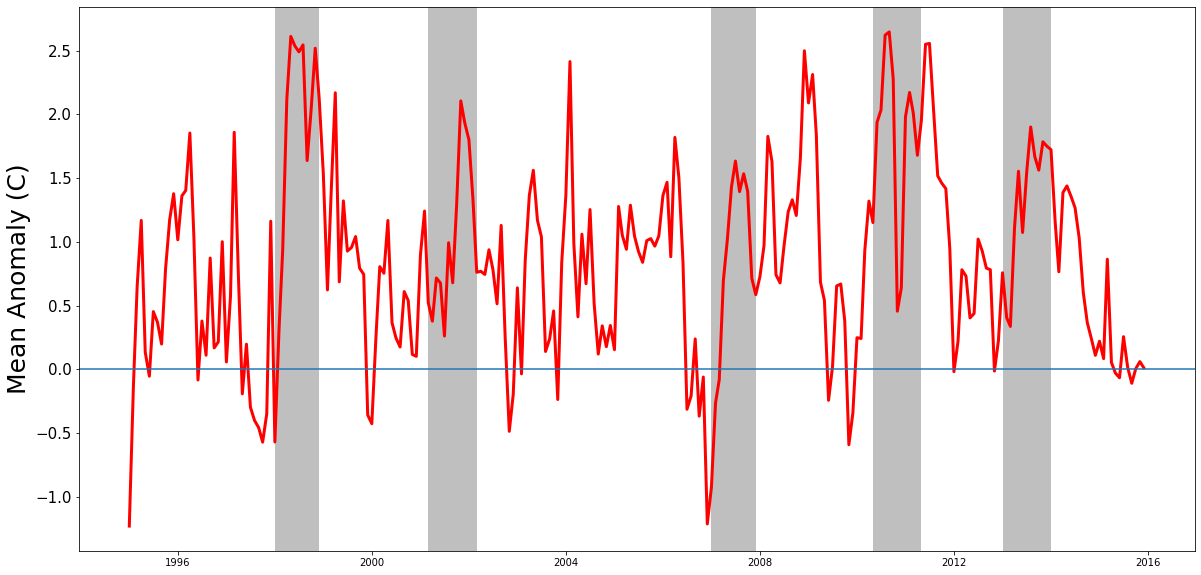

In [15]:
#CORR
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

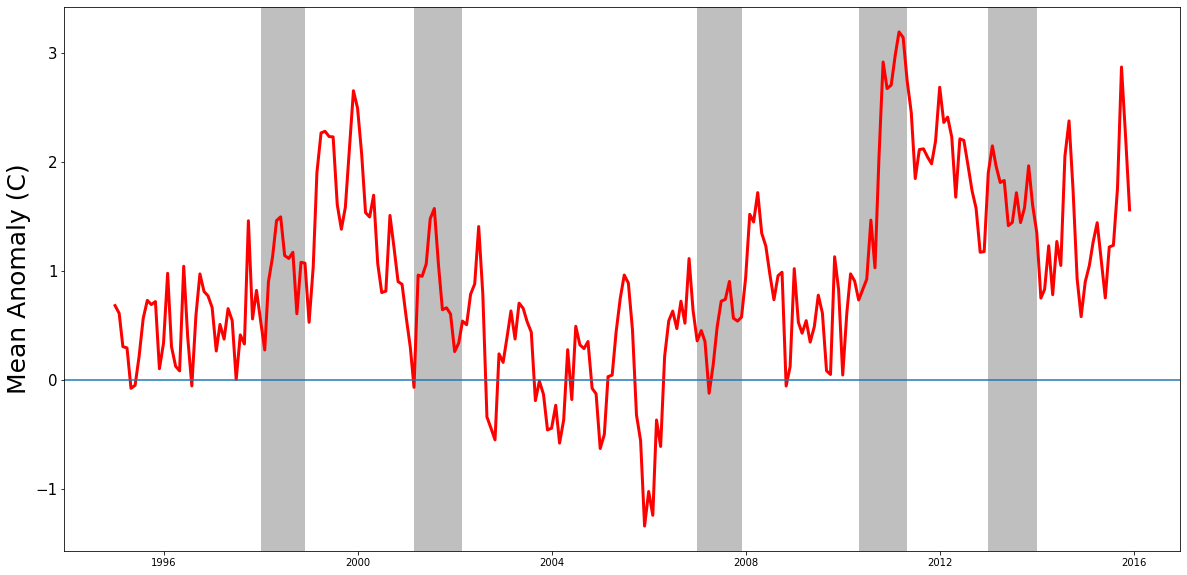

In [110]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, d[780:],linewidth = 3, color = 'r')
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
#plt.axvspan('2008-01', '20-01', facecolor='grey', alpha=0.5)

plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("pcmci_areas_1996_2015.png");

In [2]:
enso = ff.timeseries_enso('dmi.npy',1970,1994,1950)

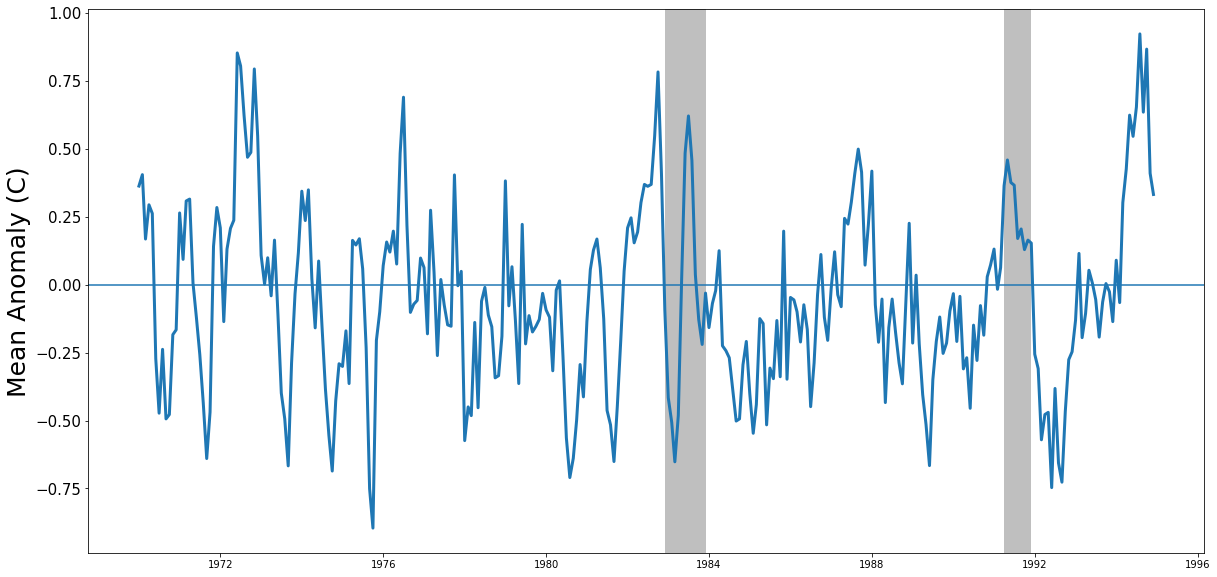

In [116]:
x = np.arange('1970-01', '1995-01', dtype='datetime64[M]')
plt.plot(x, enso, linewidth = 3)
#plt.plot(x, d[480:780], linewidth = 3)
plt.axvspan('1982-12', '1983-12', facecolor='grey', alpha=0.5)
plt.axvspan('1991-04', '1991-12', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("enso_areas_1970_1995.png");

In [117]:
enso = ff.timeseries_enso('DMI.npy',1995,2015,1950)

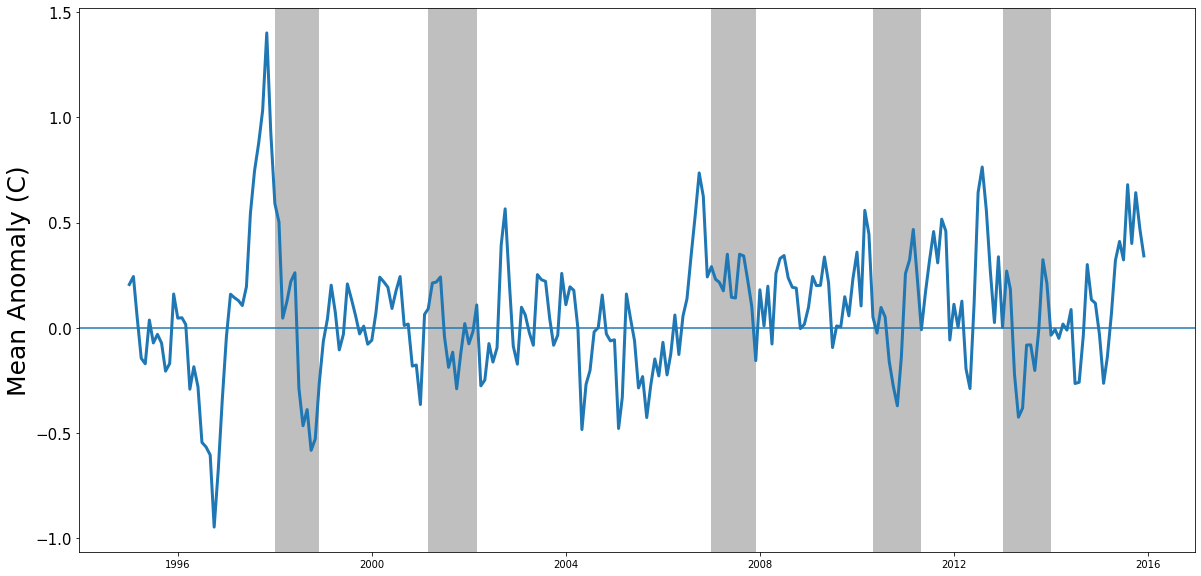

In [118]:
x = np.arange('1995-01', '2016-01', dtype='datetime64[M]')
plt.plot(x, enso,linewidth = 3)
#plt.plot(x, d[780:],linewidth = 3)
plt.axvspan('1998-01', '1998-12', facecolor='grey', alpha=0.5)
plt.axvspan('2001-03', '2002-03', facecolor='grey', alpha=0.5)
plt.axvspan('2007-01', '2007-12', facecolor='grey', alpha=0.5)
plt.axvspan('2010-05', '2011-05', facecolor='grey', alpha=0.5)
plt.axvspan('2013-01', '2014-01', facecolor='grey', alpha=0.5)
plt.axhline(0)
#plt.xlabel("Lead Time (month)", fontsize = 30)
plt.ylabel("Mean Anomaly (C)", fontsize = 25)
plt.yticks(fontsize = 15);
#plt.xticks(x, fontsize = 15);
#plt.savefig("enso_areas_1996_2015.png");